In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('data/sin_synth/SIN_NORMAL_500_v3.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,-1.037213,0.122516,2.222373,1.768441,0.535370,0.817126,0.887564,0.177032,-0.637317,0.170172,...,3.307236,3.567945,3.041047,2.650529,2.192301,NaN,NaN,NaN,0.424577,0.0
1,1.335390,1.592021,0.105620,-0.569830,-1.936606,-2.159233,0.055004,-0.304618,-0.428491,-2.114047,...,-3.127266,-2.525985,-2.156904,-1.265969,-1.088417,NaN,NaN,NaN,0.792029,0.0
2,0.576089,-0.614140,-1.955747,-0.383681,0.071087,0.605902,1.198012,1.982545,-0.035235,-1.106450,...,-2.174720,-2.015002,-1.678418,0.244067,1.764900,NaN,NaN,NaN,0.336560,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.692590
std        0.222238
min        0.247278
25%        0.485802
50%        0.780755
75%        0.903432
max        0.999553
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
args = {
    "dist_function": "original",
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x70c1f6f0bad8>,
 'dist_func_returns': False,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'fitness': <function gendis.fitness.logloss_fitness(X, y, shapelets, dist_function

In [12]:
%%time
gendis.fit(X_train, y_train)

it		avg		std		max		time
1		-0.6577		0.02		-0.585741	1.3597
2		-0.646		0.019		-0.585741	2.0957
3		-0.6373		0.02		-0.585741	2.5238
4		-0.6256		0.02		-0.585308	2.6531
5		-0.61		0.023		-0.556694	2.9171
6		-0.5975		0.022		-0.556694	2.452
7		-0.5923		0.024		-0.549577	3.1429
8		-0.5778		0.024		-0.537429	2.8749
9		-0.5656		0.023		-0.505938	2.9413
10		-0.557		0.029		-0.467531	2.8106
11		-0.551		0.031		-0.467531	3.1993
12		-0.5362		0.025		-0.467531	3.0022
13		-0.5335		0.031		-0.467531	3.8858
14		-0.5196		0.038		-0.408349	4.0286
15		-0.5107		0.033		-0.408349	4.1093
16		-0.4949		0.03		-0.407162	4.6491
17		-0.4897		0.037		-0.407162	4.2377
18		-0.4764		0.046		-0.403196	4.4596
19		-0.4634		0.042		-0.362597	4.0691
20		-0.4591		0.045		-0.362597	5.3201
21		-0.4349		0.041		-0.362597	5.3437
22		-0.4165		0.048		-0.348292	4.6143
23		-0.3937		0.049		-0.277286	4.6464
24		-0.3875		0.045		-0.277283	4.7486
25		-0.3832		0.045		-0.277283	4.727
26		-0.3752		0.037		-0.277283	3.8059
27		-0.3693		0.033		-0.277283	4.03

Process ForkPoolWorker-5:
Process ForkPoolWorker-4:
Process ForkPoolWorker-11:
Process ForkPoolWorker-8:
Process ForkPoolWorker-2:
Process ForkPoolWorker-10:
Process ForkPoolWorker-1:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-13:
Process ForkPoolWorker-12:
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  Fil

  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/connection.py", line 219, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/queues.py", line 337, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/multiprocess/queues.py", line 337, in get
    with self._rlock:
  File "/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/

In [13]:
%%time
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 5.83 s, sys: 561 µs, total: 5.83 s
Wall time: 5.83 s


In [14]:
dists = pd.DataFrame(distances_train)
dists.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,6.202920,24.011068,36.493919,0.602448,7.791234,6.855461,36.987247,29.662905,20.341158,6.819657,...,1.499632,20.374033,32.402119,3.777563,0.510765,19.061174,18.078449,24.347332,0.779531,24.522974
1,11.632209,36.394470,33.779316,2.033035,14.135374,8.511991,30.093630,34.399395,13.273712,9.069138,...,2.877442,42.497993,37.691051,3.813375,2.162498,26.070536,20.890169,39.135796,1.583008,23.142792
2,11.071699,37.091244,30.709005,0.786103,13.902171,10.086713,24.551008,32.900364,15.291162,10.443514,...,0.937132,34.480083,31.412291,4.162953,0.687582,20.224005,26.925428,31.875767,1.272607,21.655531
3,9.921147,27.839588,45.865711,1.649565,12.128348,6.179341,32.900143,26.882599,24.835634,7.031588,...,1.371706,16.667458,42.465645,4.492486,0.712265,23.293325,22.515892,25.683105,1.037007,24.876511
4,10.198144,33.462399,27.572655,0.668098,9.129136,7.952461,28.906757,20.744745,20.932413,8.535498,...,1.284941,25.017836,31.199163,3.434714,1.002856,18.136515,23.528639,25.273548,1.735021,20.416498


In [15]:
dists

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,6.202920,24.011068,36.493919,0.602448,7.791234,6.855461,36.987247,29.662905,20.341158,6.819657,...,1.499632,20.374033,32.402119,3.777563,0.510765,19.061174,18.078449,24.347332,0.779531,24.522974
1,11.632209,36.394470,33.779316,2.033035,14.135374,8.511991,30.093630,34.399395,13.273712,9.069138,...,2.877442,42.497993,37.691051,3.813375,2.162498,26.070536,20.890169,39.135796,1.583008,23.142792
2,11.071699,37.091244,30.709005,0.786103,13.902171,10.086713,24.551008,32.900364,15.291162,10.443514,...,0.937132,34.480083,31.412291,4.162953,0.687582,20.224005,26.925428,31.875767,1.272607,21.655531
3,9.921147,27.839588,45.865711,1.649565,12.128348,6.179341,32.900143,26.882599,24.835634,7.031588,...,1.371706,16.667458,42.465645,4.492486,0.712265,23.293325,22.515892,25.683105,1.037007,24.876511
4,10.198144,33.462399,27.572655,0.668098,9.129136,7.952461,28.906757,20.744745,20.932413,8.535498,...,1.284941,25.017836,31.199163,3.434714,1.002856,18.136515,23.528639,25.273548,1.735021,20.416498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.332674,35.393581,31.833609,0.416407,15.816157,6.950185,28.378660,30.611935,17.071272,7.000069,...,1.063031,30.893173,31.888878,5.221841,0.779710,16.075397,24.788656,26.649689,1.295459,20.772951
96,5.739522,18.949816,42.887959,1.546688,6.059610,7.190561,38.999767,28.720844,25.450665,7.382957,...,1.534887,17.992445,41.324680,3.598697,0.637229,25.263609,14.055391,26.062252,0.584975,31.162395
97,3.635572,13.670948,49.067841,1.681874,2.674106,6.789648,37.451981,34.826260,29.635052,9.203599,...,2.483697,20.729771,48.926308,4.294912,1.860909,25.966257,14.282722,29.408005,1.145416,29.784607
98,6.517578,23.523388,42.782578,1.050699,7.922141,0.000000,28.915573,24.314095,26.206781,6.324292,...,1.252715,27.350384,41.627068,4.818762,0.996826,18.726635,10.729135,26.866802,1.330086,21.140390


In [16]:
dists["label"] = y_train.values
dists["label"].value_counts()
dists.index = X_train.index
dists[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

In [17]:
def test_shapelet_separation(shap, shap_id):
    axs_multiplier = 0.75
    f, axs = plt.subplots(1, 3, figsize=(3*axs_multiplier*6.4, axs_multiplier*4.8))
    print(f"Testing separation for shapelet {shap_id}")
    
    # Shapelet plot
    axs[0].plot(shap)
    
    # Distance histograms plot
    bins = np.linspace(0, 120, 20)
    axs[1].hist(dists.loc[dists['label']==0, shap_id], alpha=0.5, label='sin=false')
    axs[1].hist(dists.loc[dists['label']==1, shap_id], alpha=0.5, label='sin=true')
    axs[1].legend(loc='upper right')
    
    # Distance versus sin_y
    dists.plot.scatter(x='sin_y', y=shap_id, c='DarkBlue', ax=axs[2])
    
    
    # Accuracy using the shapelet as feature
    single_shapelet_train = distances_train[:, shap_id].reshape(-1, 1)
    single_shapelet_test = distances_test[:, shap_id].reshape(-1, 1)
    
    lr = LogisticRegression()
    lr.fit(single_shapelet_train, y_train)
    y_pred = lr.predict(single_shapelet_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy = {acc}')
    print(confusion_matrix(y_test, y_pred))
    
    plt.show()

Testing separation for shapelet 0
Accuracy = 0.455
[[ 97 103]
 [115  85]]


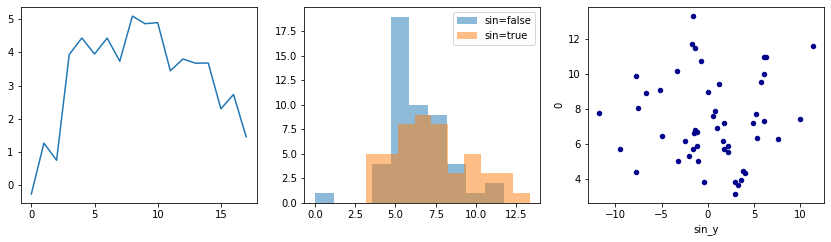

Testing separation for shapelet 1
Accuracy = 0.5425
[[100 100]
 [ 83 117]]


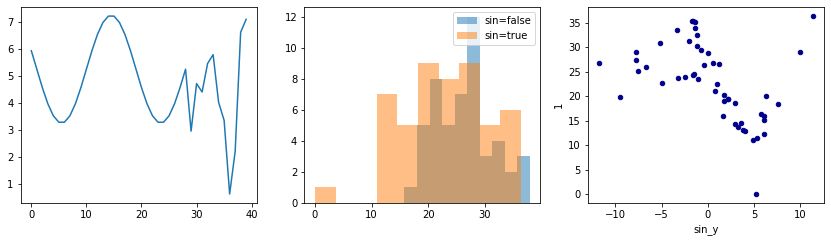

Testing separation for shapelet 2
Accuracy = 0.5525
[[112  88]
 [ 91 109]]


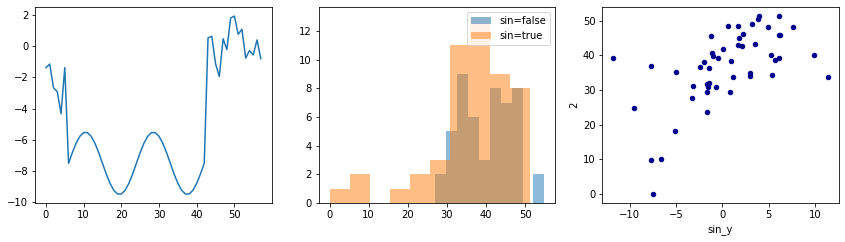

Testing separation for shapelet 3
Accuracy = 0.5275
[[106  94]
 [ 95 105]]


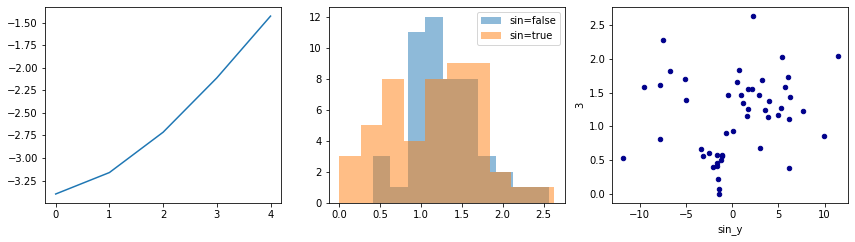

Testing separation for shapelet 4
Accuracy = 0.5
[[118  82]
 [118  82]]


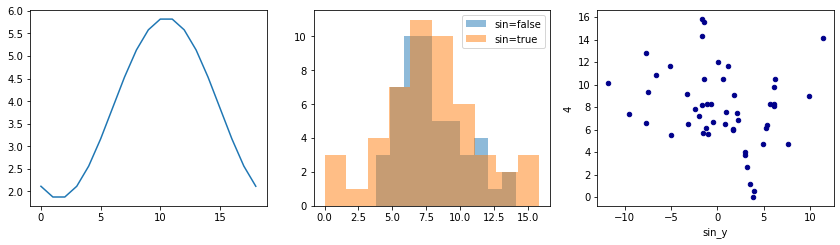

Testing separation for shapelet 5
Accuracy = 0.5175
[[107  93]
 [100 100]]


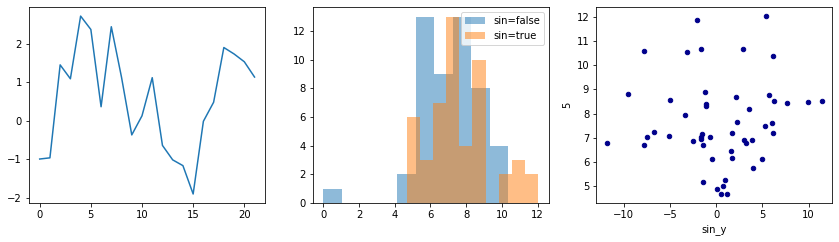

Testing separation for shapelet 6
Accuracy = 0.5175
[[110  90]
 [103  97]]


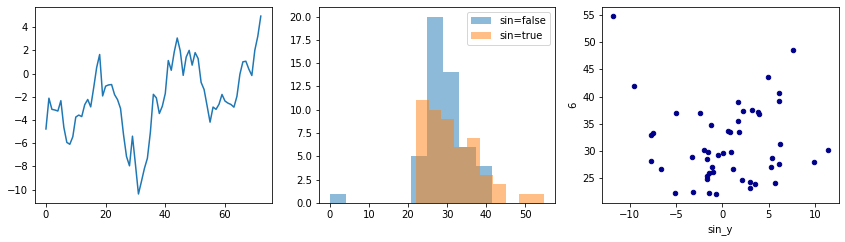

Testing separation for shapelet 7
Accuracy = 0.565
[[ 93 107]
 [ 67 133]]


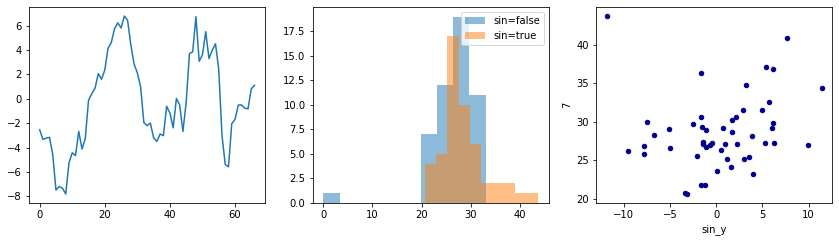

Testing separation for shapelet 8
Accuracy = 0.515
[[ 93 107]
 [ 87 113]]


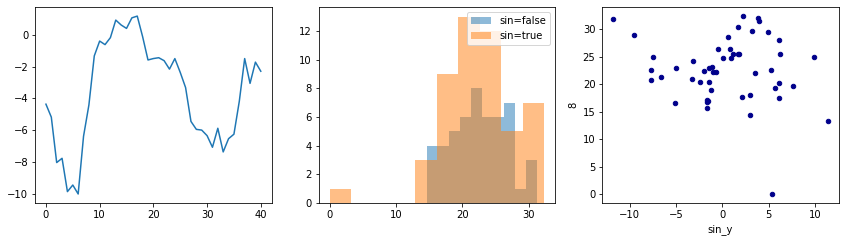

Testing separation for shapelet 9
Accuracy = 0.5275
[[104  96]
 [ 93 107]]


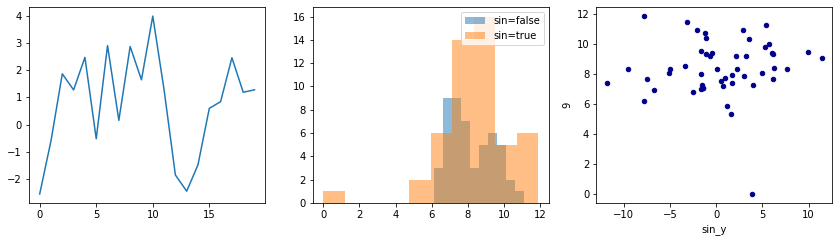

Testing separation for shapelet 10
Accuracy = 0.56
[[113  87]
 [ 89 111]]


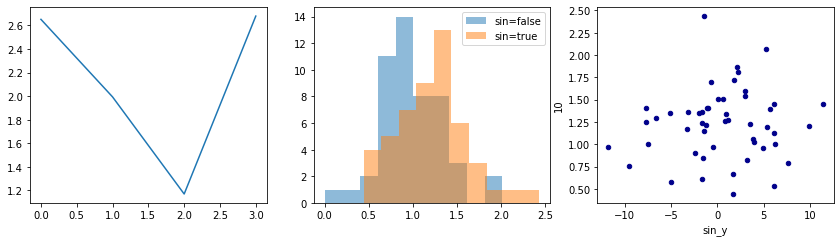

Testing separation for shapelet 11
Accuracy = 0.555
[[111  89]
 [ 89 111]]


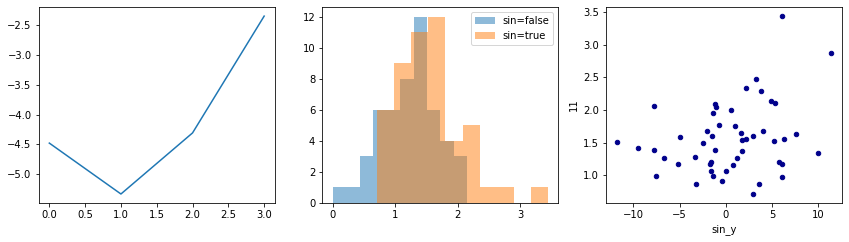

Testing separation for shapelet 12
Accuracy = 0.5175
[[101  99]
 [ 94 106]]


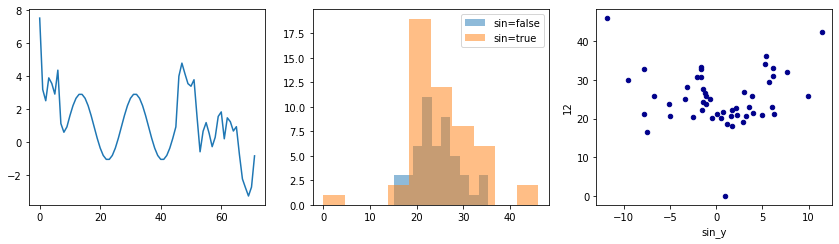

Testing separation for shapelet 13
Accuracy = 0.5575
[[117  83]
 [ 94 106]]


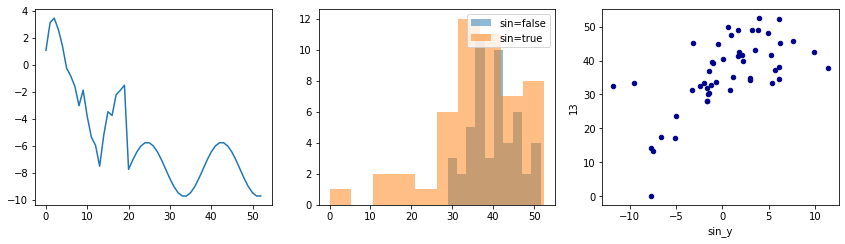

Testing separation for shapelet 14
Accuracy = 0.4975
[[108  92]
 [109  91]]


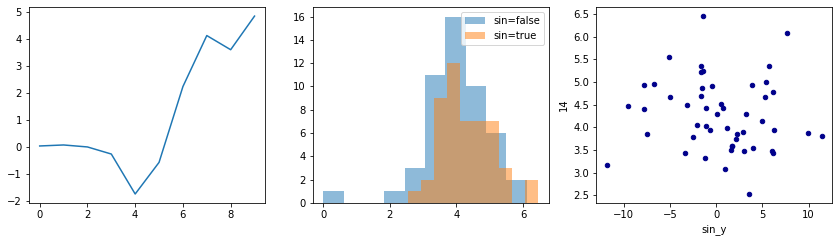

Testing separation for shapelet 15
Accuracy = 0.47
[[106  94]
 [118  82]]


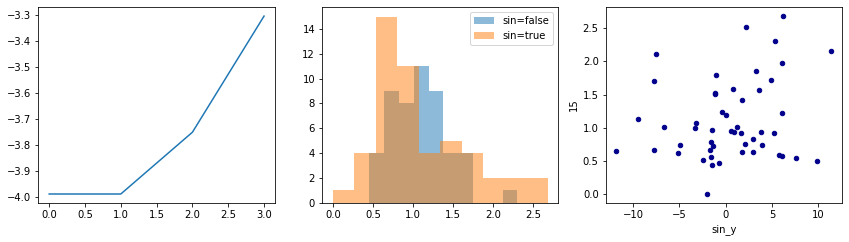

Testing separation for shapelet 16
Accuracy = 0.5525
[[110  90]
 [ 89 111]]


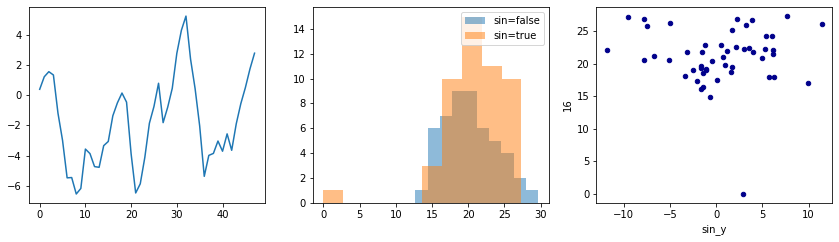

Testing separation for shapelet 17
Accuracy = 0.515
[[101  99]
 [ 95 105]]


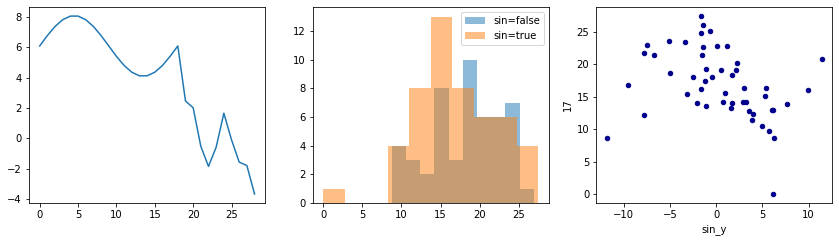

Testing separation for shapelet 18
Accuracy = 0.5425
[[112  88]
 [ 95 105]]


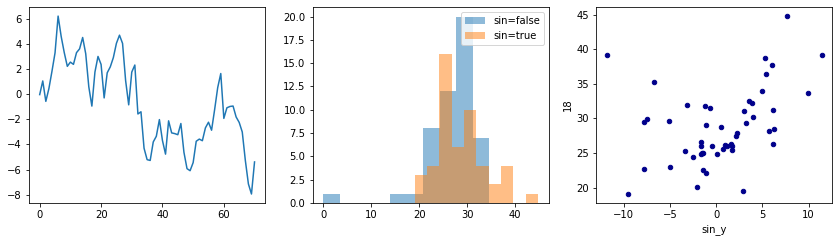

Testing separation for shapelet 19
Accuracy = 0.5425
[[100 100]
 [ 83 117]]


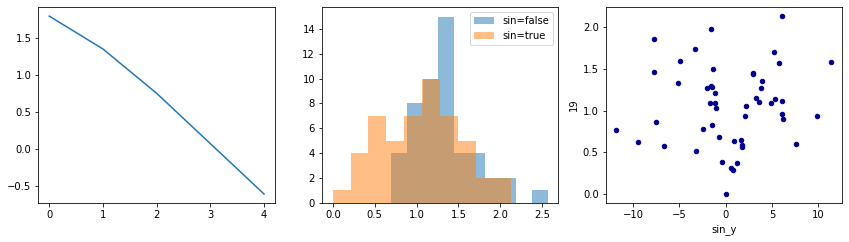

Testing separation for shapelet 20
Accuracy = 0.56
[[116  84]
 [ 92 108]]


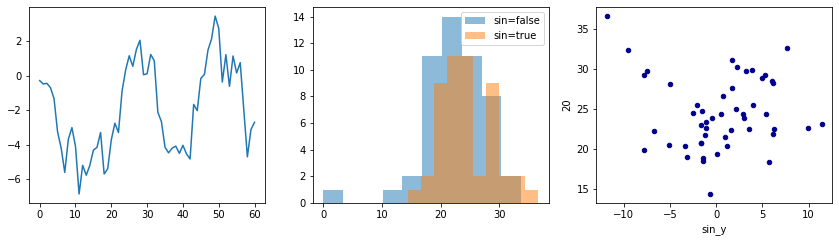

In [18]:
for i, shap in enumerate(gendis.shapelets, start=0):
    test_shapelet_separation(shap, i)

### Persistence of results

In [ ]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = './test_sin_results/'
os.makedirs(folder, exist_ok=True)

dists.to_csv(f'{folder}/test_sin_500_fixed_nonoise_distmatrix_{ts}.csv', header=False, index=False)


with open(f'{folder}/gendis_{ts}.pickle', 'wb') as file_handler:
    pickle.dump(gendis, file_handler, protocol=pickle.HIGHEST_PROTOCOL)